In [ ]:
# pip install scikit-surprise

In [14]:
from surprise import SVD
from surprise.model_selection import cross_validate
import pandas as pd
from surprise import Dataset
from surprise import Reader
import sqlite3
import numpy as np
from collections import defaultdict

In [80]:
def train_data(db = 'db.sqlite3', rating_scale=(1, 10)):

    conn = sqlite3.connect(db)
    c = conn.cursor()

    df = pd.read_sql_query("SELECT * from USER_EXERCISE_DATABASE", conn)
#     df.head()

    reader = Reader(rating_scale=rating_scale)

    data = Dataset.load_from_df(df[["user_id", "exercise_id", "user_score"]], reader)

    algo = SVD()

    trainingSet = data.build_full_trainset()
    algo.fit(trainingSet)
    
    return trainingSet


In [55]:
prediction = algo.predict(101, 435)
prediction.est
print(prediction)

user: 101        item: 435        r_ui = None   est = 6.50   {'was_impossible': False}


In [71]:
def get_top_n(predictions, user_id, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    bottom_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest and lowest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        bottom_n[uid] = user_ratings[-n:]
        
    return top_n[user_id], bottom_n[user_id]

def recommend_exercise(trainingSet, user_id, algo, n=10):

    testset = trainingSet.build_anti_testset()
    predictions = algo.test(testset)

    top_n, bottom_n = get_top_n(predictions, str(user_id), n=n)
    
    return [iid for (iid, _) in top_n]

In [82]:
trainingSet= train_data(db = 'db.sqlite3', rating_scale=(1, 10))

In [87]:
recommended_exercise = recommend_exercise(trainingSet, 101, n=10)
print(recommended_exercise)

TypeError: expected str, bytes or os.PathLike object, not int

In [91]:
def recommend_exercise(user_id, db , n=10, rating_scale=(1, 10)):

    conn = sqlite3.connect(db)
    c = conn.cursor()

    df = pd.read_sql_query("SELECT * from USER_EXERCISE_DATABASE", conn)

    reader = Reader(rating_scale=rating_scale)

    data = Dataset.load_from_df(df[["user_id", "exercise_id", "user_score"]], reader)

    algo = SVD()

    trainingSet = data.build_full_trainset()
    algo.fit(trainingSet)
    
    testset = trainingSet.build_anti_testset()
    predictions = algo.test(testset)

    top_n, bottom_n = get_top_n(predictions, str(user_id), n=n)
    
#     return [iid for (iid, _) in top_n]
    return top_n

In [98]:
recommended_exercise = recommend_exercise(101, 'db.sqlite3', n=10)
print(recommended_exercise)

[('257', 7.729319869549804), ('279', 7.5502041803880635), ('699', 7.517591842809383), ('946', 7.478076227654325), ('1040', 7.446894969838733), ('1248', 7.439953458003906), ('975', 7.4189197484283085), ('1335', 7.39584882297529), ('865', 7.385692456245072), ('567', 7.38452556653782)]


In [16]:
from surprise import SVD
from surprise.model_selection import cross_validate
import pandas as pd
from surprise import Dataset
from surprise import Reader
import sqlite3
import numpy as np
from collections import defaultdict


def get_top_n(predictions, user_id, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    bottom_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest and lowest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        bottom_n[uid] = user_ratings[-n:]
        
    return top_n[user_id], bottom_n[user_id]

def recommend_exercise(user_id, db , n=10, rating_scale=(1, 10)):

    conn = sqlite3.connect(db)
    c = conn.cursor()

    df = pd.read_sql_query("SELECT * from USER_EXERCISE", conn)

    reader = Reader(rating_scale=rating_scale)

    data = Dataset.load_from_df(df[["user_id", "exercise_id", "user_score"]], reader)

    algo = SVD()

    trainingSet = data.build_full_trainset()
    algo.fit(trainingSet)
    
    innertorawid = []
    for innerid in range(0,trainingSet.n_users):
        innertorawid.append(trainingSet.to_raw_uid(innerid))
        
    testset = trainingSet.build_anti_testset()
    predictions = algo.test(testset)

    top_n, bottom_n = get_top_n(predictions, str(user_id), n=n)
    
    return [iid for (iid, _) in top_n], algo.pu, innertorawid

In [4]:
recommend_exercise(101, 'db.sqlite3' , n=10, rating_scale=(1, 10))

(['1008', '32', '991', '646', '178', '285', '857', '864', '344', '353'],
 array([[ 8.01858044e-02, -7.49442600e-02, -3.50848659e-01, ...,
         -7.39380724e-02, -7.19492425e-02, -5.47634045e-02],
        [ 3.14915313e-02,  9.22703105e-03,  2.01993335e-04, ...,
          2.47988341e-01, -3.47714005e-02,  4.21047854e-02],
        [ 2.19942492e-01,  3.93680082e-02,  1.51755318e-01, ...,
         -3.20944421e-01,  9.83462041e-02, -8.18284295e-02],
        ...,
        [-2.54862980e-02, -2.28691949e-02,  6.64918688e-02, ...,
         -2.35293220e-02, -4.75757706e-03,  5.68564198e-02],
        [ 8.85319148e-02, -5.69040445e-03,  5.05464279e-02, ...,
          2.51086702e-03,  2.83320863e-03,  8.86440530e-02],
        [-1.46132870e-01, -6.24543176e-02,  9.99816232e-02, ...,
         -1.82437998e-01,  1.04021686e-01, -1.16098996e-01]]),
 ['843',
  '825',
  '902',
  '547',
  '183',
  '101',
  '144',
  '913',
  '784',
  '536',
  '971',
  '95',
  '250',
  '622',
  '65',
  '337',
  '573',
  '59

In [31]:
exercise = []
val = []
itemid = []
exercise, usermatrix, useriid = recommend_exercise(101, 'db.sqlite3' , n=10, rating_scale=(1, 10))

In [6]:
print(exercise)

['1008', '285', '991', '66', '1011', '107', '32', '187', '178', '864']


In [36]:
print(usermatrix[0])
print(usermatrix.shape[0])

[ 0.27478263  0.2106661  -0.02006996 -0.06300873 -0.06172044 -0.30522985
 -0.07638379 -0.00952057  0.1881555   0.06167458  0.10107105 -0.15659529
 -0.11581449 -0.00496227 -0.22695278 -0.03985531  0.01211833  0.0181284
  0.26390226  0.215197   -0.09136868 -0.10201153 -0.38943515 -0.27913216
  0.09409789  0.14465763 -0.09504917 -0.01471422 -0.0358421   0.08794379
 -0.08726586  0.20798777  0.18235559  0.02419476  0.223997   -0.15183109
  0.05956951 -0.07863555 -0.10304878 -0.21819946 -0.00590873 -0.02293913
 -0.61099527 -0.23313481 -0.01243745  0.12684995 -0.21032798 -0.15539559
  0.0069548   0.16206473  0.19285299  0.01618852  0.05207157 -0.14605323
 -0.14082246  0.26241123 -0.02841882 -0.3985119  -0.07165933  0.20547916
  0.00101248 -0.00551095 -0.19283005 -0.12262876 -0.01442587 -0.08818533
 -0.15520913  0.20691695 -0.26158754  0.05109287  0.10998774 -0.0066313
 -0.15649399  0.12451364  0.33492417 -0.16634831 -0.17379304  0.13213473
  0.05831496  0.04039059 -0.1633383   0.17622929  0.2

In [105]:
# calculate euclidean distance

from scipy.spatial import distance

def nearestuser(user, n_users, usermatrix):
    user_similarity = np.ndarray((usermatrix.shape[0],2),dtype = object)
    for i_user in range(0,usermatrix.shape[0]):
        user_similarity[i_user][0] = str(int(i_user + 1))
        user_similarity[i_user][1] = distance.euclidean(usermatrix[i_user],usermatrix[user-1])
    user_similarity = user_similarity[user_similarity[:,1].argsort()] 
    
    return user_similarity[1:n_users+1,0]
        


In [106]:
sim = nearestuser(20,4,usermatrix)
print(sim)

['27' '101' '13' '90']


In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=500, verbose=3, random_state=1)
exercise_embedding = tsne.fit_transform(val)
projection = pd.DataFrame(columns=['x', 'y'], data=exercise_embedding)
# projection['title'] = books_metadata['original_title']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 101 samples in 0.001s...
[t-SNE] Computed neighbors for 101 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 101 / 101
[t-SNE] Mean sigma: 0.649111
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 73.2576294, gradient norm = 0.4506988 (50 iterations in 0.017s)
[t-SNE] Iteration 100: error = 81.6846237, gradient norm = 0.4410259 (50 iterations in 0.016s)
[t-SNE] Iteration 150: error = 71.5206146, gradient norm = 0.4727148 (50 iterations in 0.016s)
[t-SNE] Iteration 200: error = 82.5034790, gradient norm = 0.4625356 (50 iterations in 0.017s)
[t-SNE] Iteration 250: error = 82.4544525, gradient norm = 0.4186414 (50 iterations in 0.017s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.454453
[t-SNE] Iteration 300: error = 2.5951047, gradient norm = 0.0017682 (50 iterations in 0.016s)
[t-SNE] Iteration 350: error = 2.2786894, gradient norm = 0.0010247 (

In [29]:
import plotly.express as px
fig = px.scatter(
    projection, x='x', y='y'
)
fig.show()

In [ ]:
param_grid = {'n_factors': [110, 120, 140, 160], 'n_epochs': [90, 100, 110], 'lr_all': [0.001, 0.003, 0.005, 0.008],
              'reg_all': [0.08, 0.1, 0.15]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [1]:
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
import pandas as pd
from surprise import Dataset
from surprise import Reader
import sqlite3
import numpy as np
from collections import defaultdict


def get_top_n(predictions, user_id, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    bottom_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest and lowest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        bottom_n[uid] = user_ratings[-n:]
        
    return top_n[user_id], bottom_n[user_id]

def recommend_exercise(user_id, db , n=10, rating_scale=(1, 10)):

    conn = sqlite3.connect(db)
    c = conn.cursor()

    df = pd.read_sql_query("SELECT * from USER_EXERCISE_DATABASE", conn)

    reader = Reader(rating_scale=rating_scale)

    data = Dataset.load_from_df(df[["user_id", "exercise_id", "user_score"]], reader)
    
    trainingSet = data.build_full_trainset()

    param_grid = {'n_factors': [110, 120, 140, 160], 'n_epochs': [90, 100, 110], 'lr_all': [0.001, 0.003, 0.005, 0.008],
              'reg_all': [0.08, 0.1, 0.15]}
    gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
    gs.fit(data)
    algo = gs.best_estimator['rmse']
    print(gs.best_score['rmse'])
    print(gs.best_params['rmse'])
#     cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

#     trainingSet = data.build_full_trainset()
#     algo.fit(trainingSet)
    algo = SVD()
    
    trainingSet = data.build_full_trainset()
    algo.fit(trainingSet)
    
    innertorawid = []
    for innerid in range(0,trainingSet.n_items):
        innertorawid.append(trainingSet.to_raw_iid(innerid))
        
    testset = trainingSet.build_anti_testset()
    predictions = algo.test(testset)

    top_n, bottom_n = get_top_n(predictions, str(user_id), n=n)
    
    return [iid for (iid, _) in top_n], algo.qi, innertorawid

In [2]:
exercise = []
val = []
itemid = []
exercise, val, itemid = recommend_exercise(101, 'db.sqlite3' , n=10, rating_scale=(1, 10))

DatabaseError: Execution failed on sql 'SELECT * from USER_EXERCISE_DATABASE': no such table: USER_EXERCISE_DATABASE

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=90)
principalComponents = pca.fit_transform(val)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])

# principalDf.head()

In [40]:
pca.explained_variance_ratio_

array([0.02020828, 0.01969835, 0.01916463, 0.01775898, 0.0176332 ,
       0.01684128, 0.01669894, 0.01631279, 0.01602822, 0.01559613,
       0.01539084, 0.01503967, 0.01479701, 0.01468976, 0.01455359,
       0.01450044, 0.01395851, 0.01374576, 0.01365959, 0.01348816,
       0.01326324, 0.01306094, 0.01282015, 0.01278105, 0.01267317,
       0.01235388, 0.01225395, 0.01208484, 0.01184836, 0.01171263,
       0.01146666, 0.01144518, 0.0113524 , 0.01113905, 0.01103706,
       0.01097403, 0.01090312, 0.01078634, 0.01065518, 0.01042929,
       0.01027232, 0.01018773, 0.01008805, 0.01004511, 0.00992525,
       0.00989136, 0.00965461, 0.00958437, 0.00947611, 0.00940492,
       0.00921245, 0.00909689, 0.00904501, 0.00900758, 0.00893036,
       0.00889641, 0.0087342 , 0.00858267, 0.00851058, 0.00847094,
       0.00838505, 0.00835808, 0.00813635, 0.00803489, 0.00788865,
       0.00786142, 0.00779107, 0.00771342, 0.0076525 , 0.0075253 ,
       0.00743392, 0.00727874, 0.00721952, 0.00713073, 0.00697

In [36]:
print(np.sum(pca.explained_variance_ratio_))

0.9503413256870145


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit

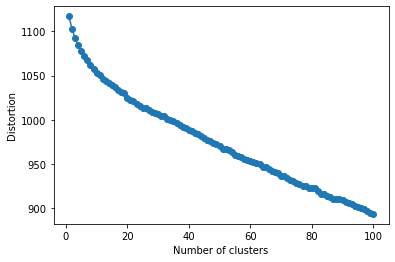

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 101):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(val)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [66]:
testset = trainingSet.build_anti_testset()
predictions = algo.test(testset)

top_n, bottom_n = get_top_n(predictions, str(101), n=10)
print(top_n)
print(bottom_n)

[('28', 9.358331782359565), ('130', 9.304000754140661), ('793', 9.277348668177334), ('742', 9.26219585957343), ('1217', 9.250884484133651), ('1192', 9.249475920753103), ('1261', 9.244018458201719), ('145', 9.21744081155974), ('153', 9.212863761374019), ('750', 9.206676745540364)]
[('1000', 8.771192675636804), ('1109', 8.760392509805936), ('46', 8.753489914799399), ('819', 8.747525940001665), ('991', 8.747079490452885), ('999', 8.739404270419929), ('1125', 8.732434530692485), ('460', 8.699656569624151), ('646', 8.672831222605208), ('1266', 8.669816671406686)]


In [76]:
conn.close()

In [62]:
#clear db
dfclear = pd.DataFrame(columns=['user_id','exercise_id','user_score','exercise_count'])
dfclear.to_sql('USER_EXERCISE_DATABASE', conn, if_exists='replace', index = False)

In [63]:
# create simulated data

# Create 50 users who likes "Machine" workout

machine_workout = pd.read_sql_query("SELECT * from EXERCISE_DATABASE WHERE equipment = 'Machine'", conn)
# machine_workout.head()
# print(len(machine_workout.index))

machine_excl = pd.read_sql_query("SELECT * from EXERCISE_DATABASE WHERE equipment <> 'Machine'", conn)

for user in range(1,51):

    for ex_rating in range(0,10):
        rated_ex = []
        random_ex_id = np.random.randint(0,len(machine_workout.index))
        if random_ex_id not in rated_ex:
            insert_user_ex_score('db.sqlite3',user,machine_workout['exercise_id'].values[random_ex_id],1,np.random.randint(9,10))
        rated_ex.append(random_ex_id)
        
        rated_ex_excl = []
        random_ex_id_excl = np.random.randint(0,len(machine_excl.index))
        if random_ex_id_excl not in rated_ex_excl:
            insert_user_ex_score('db.sqlite3',user,machine_excl['exercise_id'].values[random_ex_id_excl],1,np.random.randint(4,5))
        rated_ex_excl.append(random_ex_id_excl)
        
        

In [64]:
# create simulated data

# Create 50 users who likes "Body" workout

body_workout = pd.read_sql_query("SELECT * from EXERCISE_DATABASE WHERE equipment = 'Body'", conn)
# body_workout.head()
# print(len(body_workout.index))

body_excl = pd.read_sql_query("SELECT * from EXERCISE_DATABASE WHERE equipment <> 'Body'", conn)

for user in range(51,101):

    for ex_rating in range(0,10):
        rated_ex = []
        random_ex_id = np.random.randint(0,len(body_workout.index))
        if random_ex_id not in rated_ex:
            insert_user_ex_score('db.sqlite3',user,body_workout['exercise_id'].values[random_ex_id],1,np.random.randint(9,10))
        rated_ex.append(random_ex_id)
        
        rated_ex_excl = []
        random_ex_id_excl = np.random.randint(0,len(body_excl.index))
        if random_ex_id_excl not in rated_ex_excl:
            insert_user_ex_score('db.sqlite3',user,body_excl['exercise_id'].values[random_ex_id_excl],1,np.random.randint(4,5))
        rated_ex_excl.append(random_ex_id_excl)

In [65]:
# create simulated data

# New user who likes "Machine" workout

machine_workout = pd.read_sql_query("SELECT * from EXERCISE_DATABASE WHERE equipment = 'Machine'", conn)
# machine_workout.head()
# print(len(machine_workout.index))

machine_excl = pd.read_sql_query("SELECT * from EXERCISE_DATABASE WHERE equipment <> 'Machine'", conn)

for user in range(101,102):

    for ex_rating in range(0,1):
        rated_ex = []
        random_ex_id = np.random.randint(0,len(machine_workout.index))
        if random_ex_id not in rated_ex:
            insert_user_ex_score('db.sqlite3',user,machine_workout['exercise_id'].values[random_ex_id],1,np.random.randint(9,10))
        rated_ex.append(random_ex_id)
        
        rated_ex_excl = []
        random_ex_id_excl = np.random.randint(0,len(machine_excl.index))
        if random_ex_id_excl not in rated_ex_excl:
            insert_user_ex_score('db.sqlite3',user,machine_excl['exercise_id'].values[random_ex_id_excl],1,np.random.randint(4,5))
        rated_ex_excl.append(random_ex_id_excl)

In [ ]:
#3 April 2021 write to user_database

In [21]:
def insert_user_ex_score (db,i,fitness_level,gender,goal,bmi,intensity,user_id,location):
    #start connection
    conn = sqlite3.connect(db)
    c = conn.cursor()
    
    with conn: 
        c.execute("INSERT INTO USER_DATABASE VALUES (?,?,?,?,?,?,?,?)",(i,fitness_level,gender,goal,bmi,intensity,user_id,location))
    conn.commit()    
    conn.close()

In [25]:
#clear db
conn = sqlite3.connect('db.sqlite3')
c = conn.cursor()

dfclear = pd.DataFrame(columns=['id','fitness_level','gender','goal','bmi','intensity','user_id','location'])
dfclear.to_sql('USER_DATABASE', conn, if_exists='replace', index = False)

In [26]:
# create simulated data

# Create 101 users database with random stats

# machine_workout = pd.read_sql_query("SELECT * from EXERCISE WHERE equipment = 'Machine'", conn)
# # machine_workout.head()
# # print(len(machine_workout.index))

# machine_excl = pd.read_sql_query("SELECT * from EXERCISE WHERE equipment <> 'Machine'", conn)

import random

fitness_values = ["Beginner", "Intermediate","Advanced"]
gender_values = ["M","F"]
goal_values = ["General Fitness","Muscle Building", "Endurance Training"]
location_values = ["Home","Gym"]

count = 0
for user in range(1,102):
            count = count + 1
            insert_user_ex_score('db.sqlite3',count,random.choice(fitness_values),random.choice(gender_values),random.choice(goal_values),random.randint(18, 25),0,user,random.choice(location_values))
        

In [11]:
import random

fitness_values = ["Beginner", "Intermediate","Advanced"]

random.choice(fitness_values)

'Beginner'

In [70]:
# create simulated data

# user 1: Likes Machine workout

dfu1 = pd.read_sql_query("SELECT * from EXERCISE_DATABASE WHERE equipment = 'Machine'", conn)
dfu1.head()

# dfu1eg = dfu1[0:2]
# dfu1eg.head()

for index,row in dfu1.iterrows():

    insert_user_ex_score('db.sqlite3',1,dfu1['exercise_id'].values[index],1,np.random.randint(7,10))

dfu1x = pd.read_sql_query("SELECT * from EXERCISE_DATABASE WHERE equipment <> 'Machine'", conn)

for index,row in dfu1x.iterrows():

    insert_user_ex_score('db.sqlite3',1,dfu1x['exercise_id'].values[index],1,np.random.randint(3,6))

In [71]:
# user 2: Likes Barbell workout

dfu2 = pd.read_sql_query("SELECT * from EXERCISE_DATABASE WHERE equipment <> 'Machine'", conn)
dfu2.head()

# dfu1eg = dfu1[0:2]
# dfu1eg.head()

for index,row in dfu2.iterrows():

    insert_user_ex_score('db.sqlite3',2,dfu2['exercise_id'].values[index],1,np.random.randint(7,10))
    
dfu2x = pd.read_sql_query("SELECT * from EXERCISE_DATABASE WHERE equipment = 'Machine'", conn)

for index,row in dfu2x.iterrows():

    insert_user_ex_score('db.sqlite3',2,dfu2x['exercise_id'].values[index],1,np.random.randint(3,6))

In [14]:
def insert_user_ex_score (db,user_id,exercise_id,newcount,newscore):
    #start connection
    conn = sqlite3.connect(db)
    c = conn.cursor()
    
    with conn: 
        c.execute("INSERT INTO USER_EXERCISE_DATABASE VALUES (?,?,?,?)",(user_id,int(exercise_id),newscore,newcount))
    conn.commit()    
    conn.close()

In [18]:
ratings_dict = {
    "item": [1, 2, 1, 2, 1, 2, 1, 2, 1],
    "user": ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E'],
    "rating": [1, 2, 2, 4, 2.5, 4, 4.5, 5, 3],
}

df2 = pd.DataFrame(ratings_dict)
df2.head()

,item,user,rating
0,1,A,1.0
1,2,A,2.0
2,1,B,2.0
3,2,B,4.0
4,1,C,2.5


In [19]:
# conn = sqlite3.connect('db.sqlite3')
# # c = conn.cursor()

# df = pd.read_sql_query("SELECT * from USER_EXERCISE_DATABASE", conn)

# This is the same data that was plotted for similarity earlier
# with one new user "E" who has rated only movie 1
ratings_dict = {
    "item": [1, 2, 1, 2, 1, 2, 1, 2, 1],
    "user": ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E'],
    "rating": [1, 2, 2, 4, 2.5, 4, 4.5, 5, 3],
}

df = pd.DataFrame(ratings_dict)
reader = Reader(rating_scale=(1, 5))

# Loads Pandas dataframe
data2 = Dataset.load_from_df(df2[["user", "item", "rating"]], reader)

algo = SVD()

# cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

trainingSet2 = data2.build_full_trainset()
algo.fit(trainingSet2)


In [34]:
prediction = algo.predict('E', 1)
prediction.est

2.9700523550448628

In [5]:
from surprise import SVD
from surprise.model_selection import cross_validate
import pandas as pd
from surprise import Dataset
from surprise import Reader
import sqlite3
import numpy as np
from collections import defaultdict

conn = sqlite3.connect('db.sqlite3')
c = conn.cursor()

df = pd.read_sql_query("SELECT * from USER_EXERCISE", conn)
df.head()

,id,user_score,exercise_count,exercise_id,userdata_id
0,1,8.0,1,749,3
1,2,8.0,1,141,3
2,3,8.0,1,453,3
3,4,8.0,1,111,3
4,5,8.0,1,227,3


In [21]:
#clear db
dfclear = pd.DataFrame(columns=['id', 'user_id','exercise_id','user_score','exercise_count'])
dfclear.to_sql('USER_EXERCISE', conn, if_exists='replace', index = False)

In [15]:
def insert_user_ex_score (db,i,user_id,exercise_id,newcount,newscore):
    #start connection
    conn = sqlite3.connect(db)
    c = conn.cursor()
    
    with conn: 
        c.execute("INSERT INTO USER_EXERCISE VALUES (?,?,?,?,?)",(i,user_id,int(exercise_id),newscore,newcount))
    conn.commit()    
    conn.close()

In [22]:
# create simulated data

# Create 50 users who likes "Machine" workout

machine_workout = pd.read_sql_query("SELECT * from EXERCISE WHERE equipment = 'Machine'", conn)
# machine_workout.head()
# print(len(machine_workout.index))

machine_excl = pd.read_sql_query("SELECT * from EXERCISE WHERE equipment <> 'Machine'", conn)
count = 0
for user in range(1,51):

    for ex_rating in range(0,10):
        rated_ex = []
        random_ex_id = np.random.randint(0,len(machine_workout.index))
        if random_ex_id not in rated_ex:
            count = count + 1
            insert_user_ex_score('db.sqlite3',count,user,machine_workout['id'].values[random_ex_id],1,np.random.randint(9,10))
        rated_ex.append(random_ex_id)
        
        rated_ex_excl = []
        random_ex_id_excl = np.random.randint(0,len(machine_excl.index))
        if random_ex_id_excl not in rated_ex_excl:
            count = count + 1
            insert_user_ex_score('db.sqlite3',count,user,machine_excl['id'].values[random_ex_id_excl],1,np.random.randint(4,5))
        rated_ex_excl.append(random_ex_id_excl)

In [23]:
# create simulated data

# Create 50 users who likes "Body" workout

body_workout = pd.read_sql_query("SELECT * from EXERCISE WHERE equipment = 'Body'", conn)
# body_workout.head()
# print(len(body_workout.index))

body_excl = pd.read_sql_query("SELECT * from EXERCISE WHERE equipment <> 'Body'", conn)

for user in range(51,101):

    for ex_rating in range(0,10):
        rated_ex = []
        random_ex_id = np.random.randint(0,len(body_workout.index))
        if random_ex_id not in rated_ex:
            count = count + 1
            insert_user_ex_score('db.sqlite3',count,user,body_workout['id'].values[random_ex_id],1,np.random.randint(9,10))
        rated_ex.append(random_ex_id)
        
        rated_ex_excl = []
        random_ex_id_excl = np.random.randint(0,len(body_excl.index))
        if random_ex_id_excl not in rated_ex_excl:
            count = count + 1
            insert_user_ex_score('db.sqlite3',count,user,body_excl['id'].values[random_ex_id_excl],1,np.random.randint(4,5))
        rated_ex_excl.append(random_ex_id_excl)

In [24]:
# create simulated data

# New user who likes "Machine" workout

machine_workout = pd.read_sql_query("SELECT * from EXERCISE WHERE equipment = 'Machine'", conn)
# machine_workout.head()
# print(len(machine_workout.index))

machine_excl = pd.read_sql_query("SELECT * from EXERCISE WHERE equipment <> 'Machine'", conn)

for user in range(101,102):

    for ex_rating in range(0,1):
        rated_ex = []
        random_ex_id = np.random.randint(0,len(machine_workout.index))
        if random_ex_id not in rated_ex:
            count = count + 1
            insert_user_ex_score('db.sqlite3',count,user,machine_workout['id'].values[random_ex_id],1,np.random.randint(9,10))
        rated_ex.append(random_ex_id)
        
        rated_ex_excl = []
        random_ex_id_excl = np.random.randint(0,len(machine_excl.index))
        if random_ex_id_excl not in rated_ex_excl:
            count = count + 1
            insert_user_ex_score('db.sqlite3',count,user,machine_excl['id'].values[random_ex_id_excl],1,np.random.randint(4,5))
        rated_ex_excl.append(random_ex_id_excl)

In [9]:

from surprise import SVD
from surprise.model_selection import cross_validate
import pandas as pd
from surprise import Dataset
from surprise import Reader
import sqlite3
import numpy as np
from collections import defaultdict


def get_top_n(predictions, user_id, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    bottom_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest and lowest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        bottom_n[uid] = user_ratings[-n:]
        
    return top_n[user_id], bottom_n[user_id]

def recommend_exercise(user_id, db , n=10, rating_scale=(1, 10)):

    conn = sqlite3.connect(db)
    c = conn.cursor()

    df = pd.read_sql_query("SELECT * from USER_EXERCISE", conn)
#     df = db
    reader = Reader(rating_scale=rating_scale)

    data = Dataset.load_from_df(df[["user_id", "exercise_id", "user_score"]], reader)

    algo = SVD()

    trainingSet = data.build_full_trainset()
    algo.fit(trainingSet)
    
    innertorawid = []
    for innerid in range(0,trainingSet.n_items):
        innertorawid.append(trainingSet.to_raw_iid(innerid))
        
    print(trainingSet.to_raw_iid(0))
    
    testset = trainingSet.build_anti_testset()
    predictions = algo.test(testset)

    top_n, bottom_n = get_top_n(predictions, str(user_id), n=n)
    
    return [iid for (iid, _) in top_n], algo.qi, innertorawid

In [8]:
exercise = []
val = []
itemid = []
exercise, val, itemid = recommend_exercise(101, 'db.sqlite3' , n=10, rating_scale=(1, 10))

TypeError: string indices must be integers